## Importing the dependecies

In [30]:
# ! pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [31]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MarketWatch GME data

In [32]:
df = pd.read_csv('data/NTPC.BO.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


# Coverting date to datetimeformat

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [35]:
# df['Open'] = df['Open'].apply(lambda x: float(x.replace(",","")))

In [36]:
# df['High'] = df['High'].apply(lambda x: float(x.replace(",","")))

In [37]:
# df['Low'] = df['Low'].apply(lambda x: float(x.replace(",","")))

In [38]:
# df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))

In [39]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-18,91.599998,94.250000,90.000000,92.800003,84.782814,690319.0
1,2020-06-19,93.000000,94.000000,92.500000,92.949997,84.919838,356216.0
2,2020-06-22,93.500000,95.900002,93.449997,95.199997,86.975456,464773.0
3,2020-06-23,95.199997,101.250000,95.150002,100.750000,92.045990,727152.0
4,2020-06-24,101.650002,103.699997,96.750000,97.000000,88.619965,1326954.0


In [40]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-18,91.599998,94.250000,90.000000,92.800003,84.782814,690319.0
2020-06-19,93.000000,94.000000,92.500000,92.949997,84.919838,356216.0
2020-06-22,93.500000,95.900002,93.449997,95.199997,86.975456,464773.0
2020-06-23,95.199997,101.250000,95.150002,100.750000,92.045990,727152.0
2020-06-24,101.650002,103.699997,96.750000,97.000000,88.619965,1326954.0


In [41]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,200),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [42]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [ 92.800003  92.949997  95.199997 100.75      97.        96.199997
  97.050003  94.900002  95.849998  93.550003  93.349998  94.349998
  95.199997  92.550003  91.        91.199997  90.400002  89.849998
  87.699997  88.        86.75      88.300003  87.150002  88.400002
  90.400002  90.650002  89.349998  87.650002  88.550003  88.099998
  86.599998  87.        85.550003  85.699997  85.900002  86.099998
  85.75      88.150002  88.150002  88.849998  87.199997  88.400002
  95.400002  95.099998  94.650002 101.150002 105.949997 105.449997
 103.75     102.75     102.550003 101.5       96.5       99.900002
  98.949997  97.75      94.800003  92.5       90.599998  90.300003
  90.550003  90.150002  90.900002  91.        89.699997  88.599998
  90.5       88.300003  87.75      85.099998  82.650002  84.699997
  87.550003  85.25      85.199997  84.800003  84.349998  84.150002
  82.800003  82.550003  82.900002  82.699997  82.699997  79.099998
  78.949997  80.349998  81.75      80.599998  82.

## Build Environment

 n_state
[[106.        -2.75    ]
 [103.        -3.      ]
 [104.150002   1.150002]
 [107.699997   3.549995]
 [106.449997  -1.25    ]]
 reward
0
  done
True
  info
{'total_reward': nan, 'total_profit': nan, 'position': 1}
 


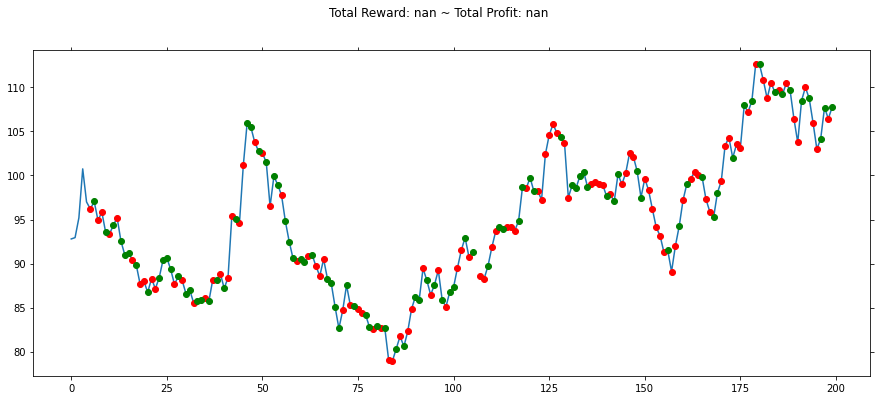

In [43]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.savefig("Images\Initial_Images\Initial NTPC",dpi=100)
plt.show()

In [44]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [45]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [46]:
# print(df.dtypes)
# #inintially volume is object/string changing it to float
# df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# # (x.replace",","") stripping/removing all the commas


### 3.1.3 Calculate SMA,RSI and OBV

In [47]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [48]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,91.599998,94.250000,90.000000,92.800003,84.782814,690319.0,0.000000,0.000000,0.0
2020-06-19,93.000000,94.000000,92.500000,92.949997,84.919838,356216.0,0.000000,100.000000,356216.0
2020-06-22,93.500000,95.900002,93.449997,95.199997,86.975456,464773.0,0.000000,100.000000,820989.0
2020-06-23,95.199997,101.250000,95.150002,100.750000,92.045990,727152.0,0.000000,100.000000,1548141.0
2020-06-24,101.650002,103.699997,96.750000,97.000000,88.619965,1326954.0,0.000000,65.796277,221187.0
2020-06-25,97.000000,98.500000,94.449997,96.199997,87.889069,954156.0,0.000000,61.002621,-732969.0
2020-06-26,96.500000,97.400002,95.650002,97.050003,88.665642,527945.0,0.000000,64.003451,-205024.0
2020-06-29,98.000000,98.000000,94.449997,94.900002,86.701385,630801.0,0.000000,52.912565,-835825.0
2020-06-30,96.150002,97.750000,95.250000,95.849998,87.569305,807244.0,0.000000,56.499511,-28581.0


#### 3.1.4 Create New Environment

In [49]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [50]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [51]:
env2.prices

array([ 90.      ,  92.5     ,  93.449997,  95.150002,  96.75    ,
        94.449997,  95.650002,  94.449997,  95.25    ,  92.349998,
        93.      ,  92.75    ,  94.949997,  92.300003,  90.800003,
        90.849998,  89.800003,  89.5     ,  87.449997,  87.75    ,
        85.900002,  87.050003,  87.      ,  86.800003,  88.650002,
        90.349998,  88.550003,  87.300003,  86.900002,  87.949997,
        86.150002,  86.300003,  85.050003,  85.349998,  85.400002,
        85.699997,  85.400002,  86.300003,  87.800003,  87.099998,
        86.5     ,  86.849998,  89.199997,  94.099998,  94.25    ,
        94.449997, 101.699997, 103.75    , 102.900002, 101.550003])

In [52]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,91.599998,94.250000,90.000000,92.800003,84.782814,690319.0,0.0,0.000000,0.0
2020-06-19,93.000000,94.000000,92.500000,92.949997,84.919838,356216.0,0.0,100.000000,356216.0
2020-06-22,93.500000,95.900002,93.449997,95.199997,86.975456,464773.0,0.0,100.000000,820989.0
2020-06-23,95.199997,101.250000,95.150002,100.750000,92.045990,727152.0,0.0,100.000000,1548141.0
2020-06-24,101.650002,103.699997,96.750000,97.000000,88.619965,1326954.0,0.0,65.796277,221187.0


In [53]:
env2.signal_features

array([[ 9.00000000e+01,  6.90319000e+05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 9.25000000e+01,  3.56216000e+05,  0.00000000e+00,
         1.00000000e+02,  3.56216000e+05],
       [ 9.34499970e+01,  4.64773000e+05,  0.00000000e+00,
         1.00000000e+02,  8.20989000e+05],
       [ 9.51500020e+01,  7.27152000e+05,  0.00000000e+00,
         1.00000000e+02,  1.54814100e+06],
       [ 9.67500000e+01,  1.32695400e+06,  0.00000000e+00,
         6.57962772e+01,  2.21187000e+05],
       [ 9.44499970e+01,  9.54156000e+05,  0.00000000e+00,
         6.10026207e+01, -7.32969000e+05],
       [ 9.56500020e+01,  5.27945000e+05,  0.00000000e+00,
         6.40034515e+01, -2.05024000e+05],
       [ 9.44499970e+01,  6.30801000e+05,  0.00000000e+00,
         5.29125653e+01, -8.35825000e+05],
       [ 9.52500000e+01,  8.07244000e+05,  0.00000000e+00,
         5.64995109e+01, -2.85810000e+04],
       [ 9.23499980e+01,  8.55790000e+05,  0.00000000e+00,
         4.71373747e+01

## Building Environment and Training

In [54]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [55]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn

---------------------------------
| explained_variance | 0.0453   |
| fps                | 15       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 2.94     |
---------------------------------
---------------------------------
| explained_variance | -0.125   |
| fps                | 220      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.00469  |
| fps                | 225      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 8.48     |
---------------------------------
---------------------------------
| explained_variance | 0.136    |
| fps                | 245      |
| nupdates           | 300      |
| policy_entropy     | 0.692    |
| total_timest

## Testing the model

In [65]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(180,240))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': 16.750016000000016, 'total_profit': 0.906276025560714, 'position': 0}
action is [0]


# Visualising our model

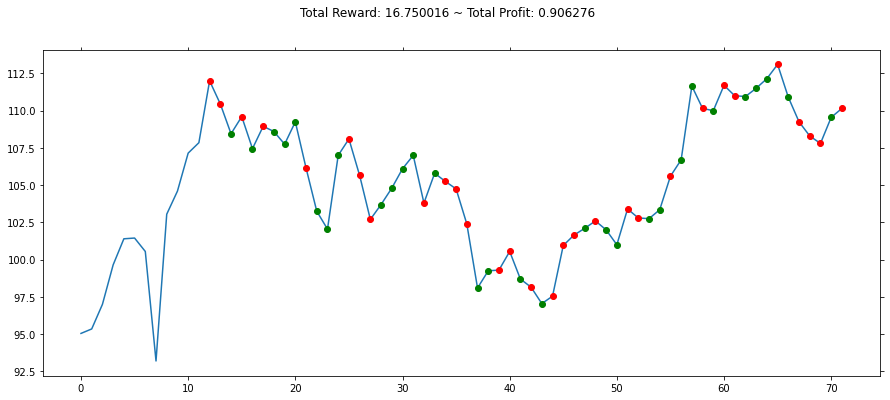

In [66]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()

plt.savefig("NTPC2",dpi=100)
plt.show()

In [67]:
! git add "NTPCStocksTrader.ipynb"
! git commit -m "NTPC stocks"
! git push origin main

fatal: pathspec 'NTPCStocksTrader.ipynb' did not match any files


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../AutonomusTaxiRL/TaxilRL.ipynb
	modified:   ../Bot_Stock_Market_Trading.ipynb
	modified:   ../FrozenLakeRL/FrozenLake.ipynb
	modified:   ../MarioRL/MarioRL.ipynb
	modified:   ../SpaceInvaderRL/SpaceInvadersAgent.ipynb
	modified:   ABRFL.ipynb
	modified:   AirtelStocksTrader.ipynb
	modified:   AppoloStocksTrader.ipynb
	modified:   DLFStocksTrader.ipynb
	modified:   GEstocksTrader.ipynb
	modified:   HDFCstocksTrader.ipynb
	modified:   ITCStocksTrader.ipynb
	modified:   RPowerStocksTrader.ipynb
	modified:   SAILstocksTrader.ipynb
	modified:   SpiceJetStocksTrader.ipynb
	modified:   TCSstocksTrader - Copy.ipynb
	modified:   ../StockTradingUpdated/Updated_stock_reinforcement.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be co

Everything up-to-date
